In [1]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY

In [2]:
# description: this program uses an artificial recurrent neural network named Long Short Term Memory (LSTM)
#              to predict the close stock price of a corporation (Apple Inc.) using the past 60 day stock price

In [1]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/My/opt/anaconda3/lib/python3.7/site-packages/t

In [2]:
# get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.567886
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.737518
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.644707


In [3]:
# get the number of rows and columns in the data set
df.shape

(2003, 6)

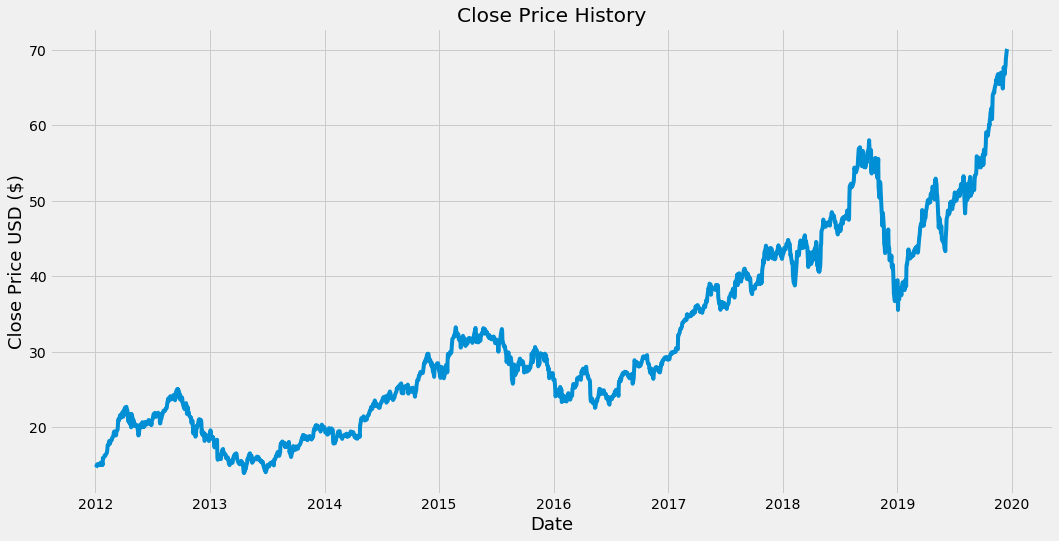

In [4]:
# visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df.Close)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# create a new dataframe with only the close column
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
train_size = math.ceil(len(dataset) * 0.8)
train_size

1603

In [9]:
# scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [12]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[:train_size]
# split the data into x_train and y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [13]:
# convert the x_train and y_train datasets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# reshape the data
# currently x_train.shape() is (1543, 60) or is 2D
# but the LSTM model expects a 3D matrix (# samples, # timesteps, # features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# train the model; 1 epoch of 1543 iterations, which takes a long time
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1543/1543 [==============================] - 570s 369ms/step - loss: 8.3830e-04


In [18]:
# create the testing data
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[train_size-60:]
# create the datasets x_test and y_test
x_test = []
y_test = dataset[train_size:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
# convert the data to a numpy array, for use in the LSTM model
x_test = np.array(x_test)

In [20]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.6450662612915039

/Users/My/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


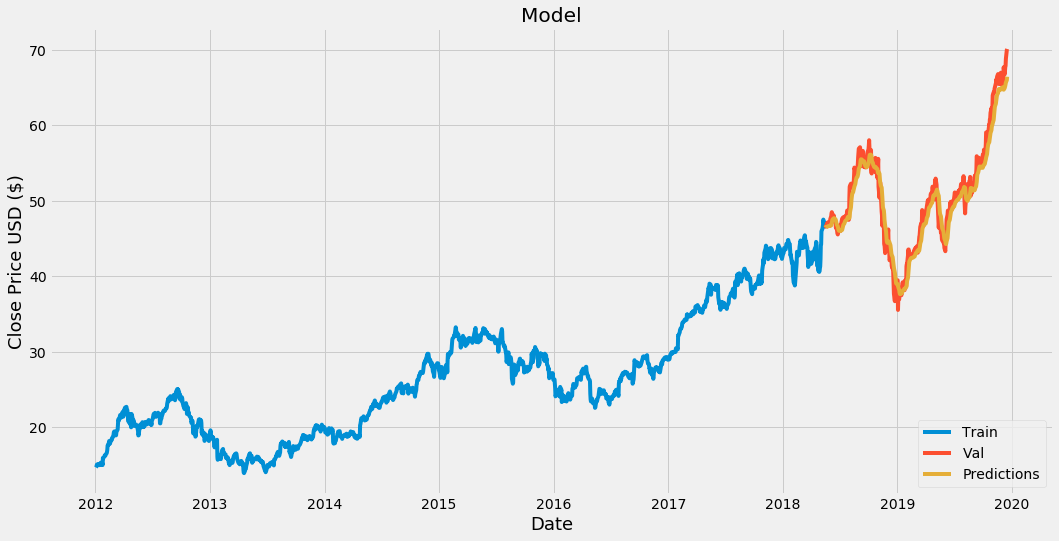

In [25]:
# plot the data
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train.Close)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.459366
2018-05-18,46.577499,46.532181
2018-05-21,46.907501,46.541027
2018-05-22,46.790001,46.559887
2018-05-23,47.090000,46.564419
...,...,...
2019-12-11,67.692497,65.214828
2019-12-12,67.864998,65.427605
2019-12-13,68.787498,65.654388


In [28]:
# prediction for 12-18-2019
# this quote has been defined earlier; we could reuse the variable instead of creating anew
quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# create a new dataframe
new_df = quote.filter(['Close'])
# get the last 60 days closing price values and convert the dataframe to an array
last_60 = new_df[-60:].values
# scale the data to be values between 0 and 1
last_60_scaled = scaler.transform(last_60)
# create an empty list
X_test = []
# append the past 60 days
X_test.append(last_60_scaled)
# convert the X_test to numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for December 18, 2019:', pred_price)

Predicted price for December 18, 2019: [[66.89143]]


In [ ]:
# get the actual price on 12-18-2019
actual = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')